
### О ЛР:

- scikit-learn & decision trees
- Coding decision tree & Categorical features


----

#### Самостоятельная оценка результатов

Для удобства проверки, исходя из набора решенных задач, посчитайте свою максимальную оценку.

**Оценка**:

***DeadLine - 21.05.2024 23:59***

### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание. Иначе задание не проверяется.




### Оценивание и штрафы


Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 5 баллов.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты не могут получить за него больше 0 баллов.

Неэффективная реализация кода может негативно отразиться на оценке.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

sns.set(style="whitegrid")

import warnings

warnings.filterwarnings("ignore")

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [3]:
from sklearn.datasets import make_moons, make_circles, make_classification

datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(
        n_classes=3,
        n_clusters_per_class=1,
        n_features=2,
        class_sep=0.8,
        random_state=3,
        n_redundant=0,
    ),
]

In [4]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

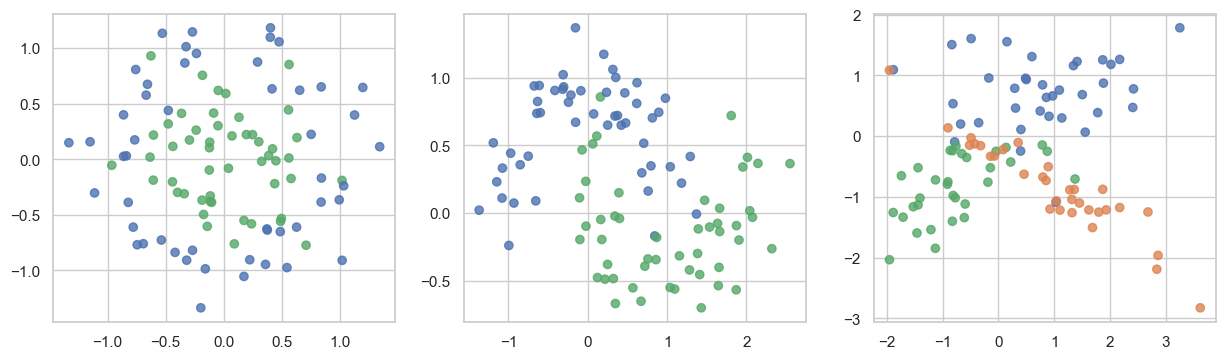

In [5]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=0.8)

__Задание 1. [0.5 балла]__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [6]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        cmap=cmap,
        alpha=0.7,
        edgecolors=np.array(palette)[y],
        linewidths=2,
    )
    plt.show()

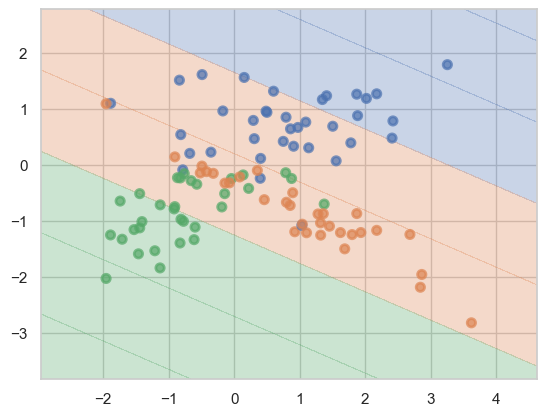

In [7]:
# Пример:
from sklearn.linear_model import LinearRegression

X, y = datasets[2]
lr = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

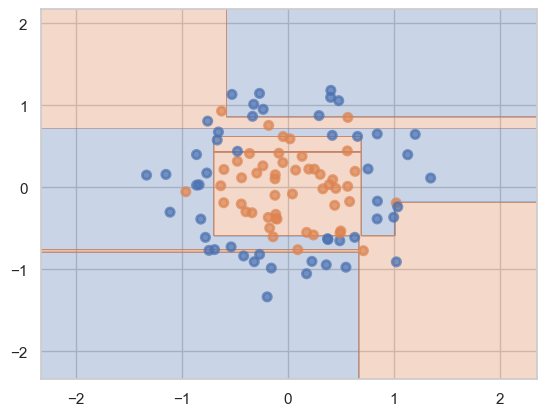

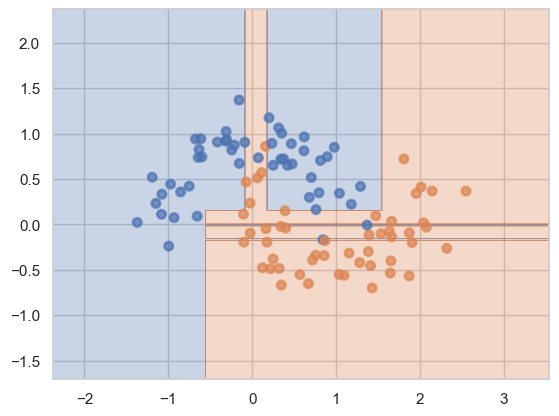

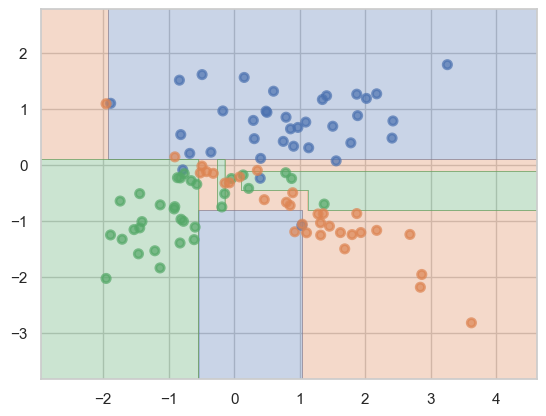

In [8]:
for dataset in datasets:
    X, y = dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)
    plot_surface(clf, X, y)

__Ответ:__ Да, местами несколько выбросов меняют классификацию области

__Задание 2. [0.75 балла]__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

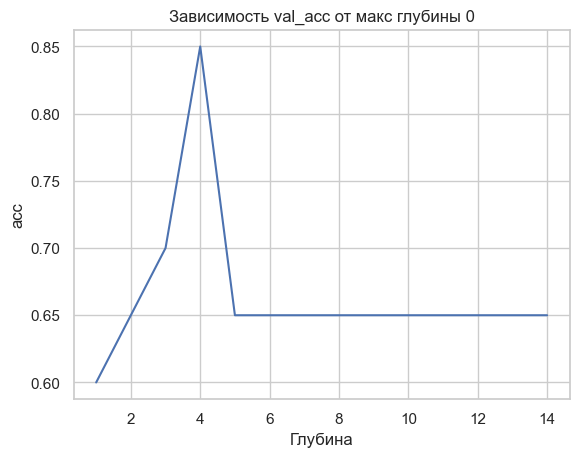

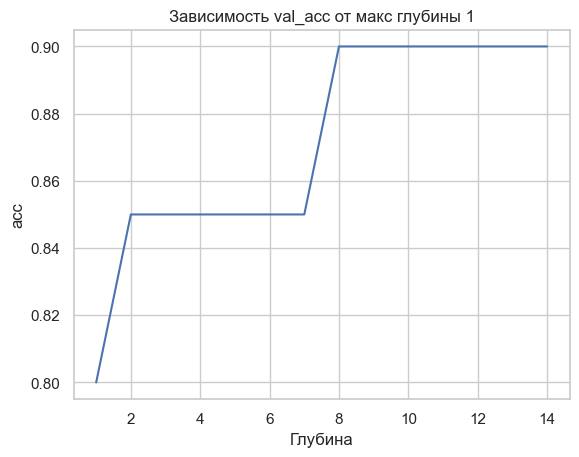

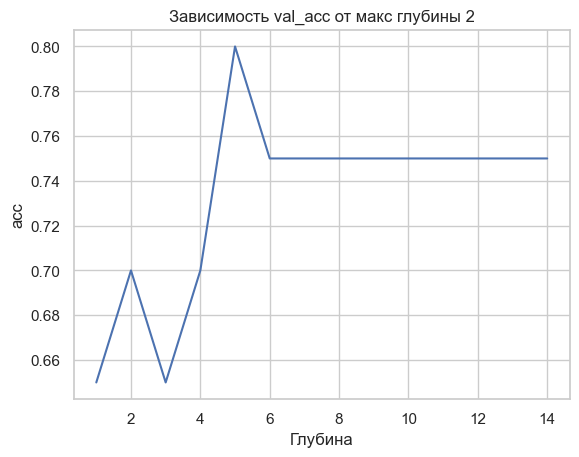

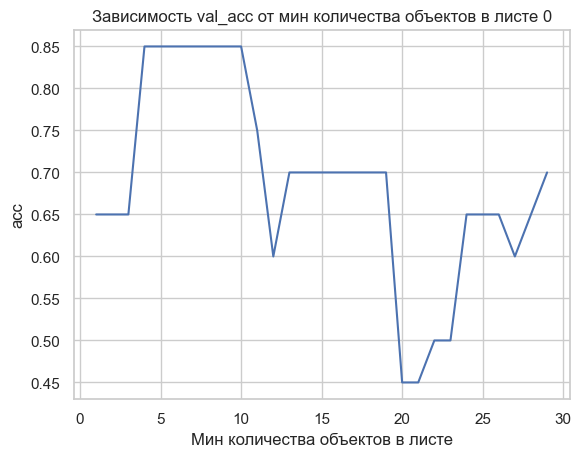

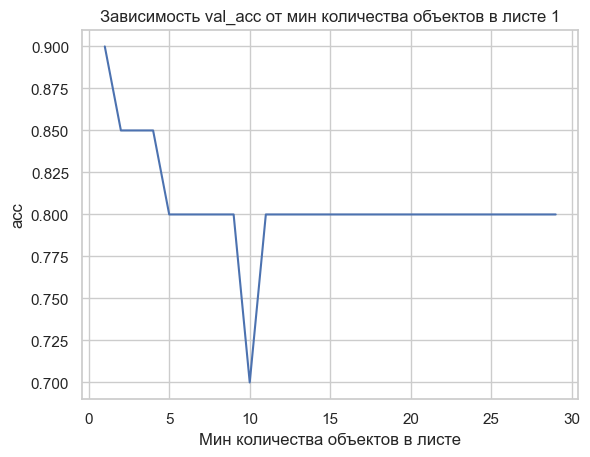

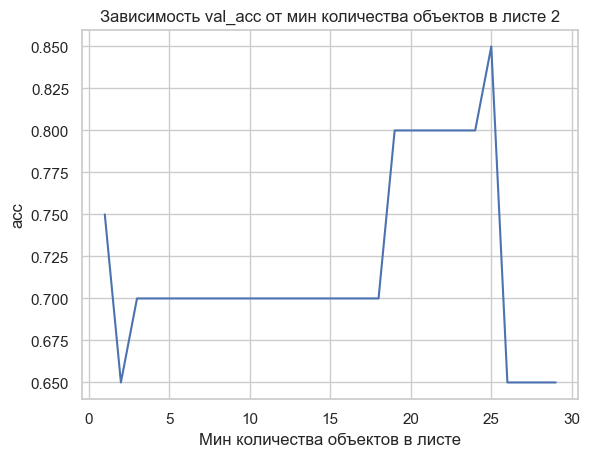

In [9]:
from sklearn.metrics import accuracy_score

for d_ind in range(len(datasets)):
    accuracy_depth = [] 
    for max_depth in range(1, 15):
        X, y = datasets[d_ind]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
        clf = DecisionTreeClassifier(random_state=42, max_depth=max_depth)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        # plot_surface(clf, X_train, y_train)
        accuracy_depth.append(accuracy_score(y_test, y_pred))
        
    plt.plot(range(1, 15), accuracy_depth)
    plt.title('Зависимость val_acc от макс глубины ' + str(d_ind))
    plt.xlabel('Глубина')
    plt.ylabel('acc')
    plt.show()
    

for d_ind in range(len(datasets)):
    accuracy_leaf = []
    for min_samples_leaf in range(1, 30):
        X, y = datasets[d_ind]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
        clf = DecisionTreeClassifier(random_state=42, min_samples_leaf=min_samples_leaf)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        # plot_surface(clf, X_train, y_train)
        accuracy_leaf.append(accuracy_score(y_test, y_pred))

    plt.plot(range(1, 30), accuracy_leaf)
    plt.title('Зависимость val_acc от мин количества объектов в листе ' + str(d_ind))
    plt.xlabel('Мин количества объектов в листе')
    plt.ylabel('acc')
    plt.show()


__Ответ:__ Для разных датасетов разные оптимальные значения максимальной глубины и минимального количества объектов в листе при котором достигаются наилучшие результаты.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. [0.75 балл]__

Реализуйте функцию `find_best_split` из модуля `tree_code.py`

__Задание 4. [0.25 балла]__

`students.csv` - это преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). Первые пять столбцов содержат признаки каждого объекта, а последний столбец — целевую переменную (класс: 0 или 1). Нужно построить график, который на одном изображении отобразит пять кривых "порог — значение критерия Джини" для всех пяти признаков. Кроме того, стоит отдельно визуализировать scatter-графики "значение признака — класс" для каждого из пяти признаков.

Это нужно и для выявления значимости признаков, и для пороговых значений. Да и глазу приятно

In [10]:
df = pd.read_csv('students.csv')
df.columns

Index(['STG', 'SCG', 'STR', 'LPR', 'PEG', 'UNS'], dtype='object')

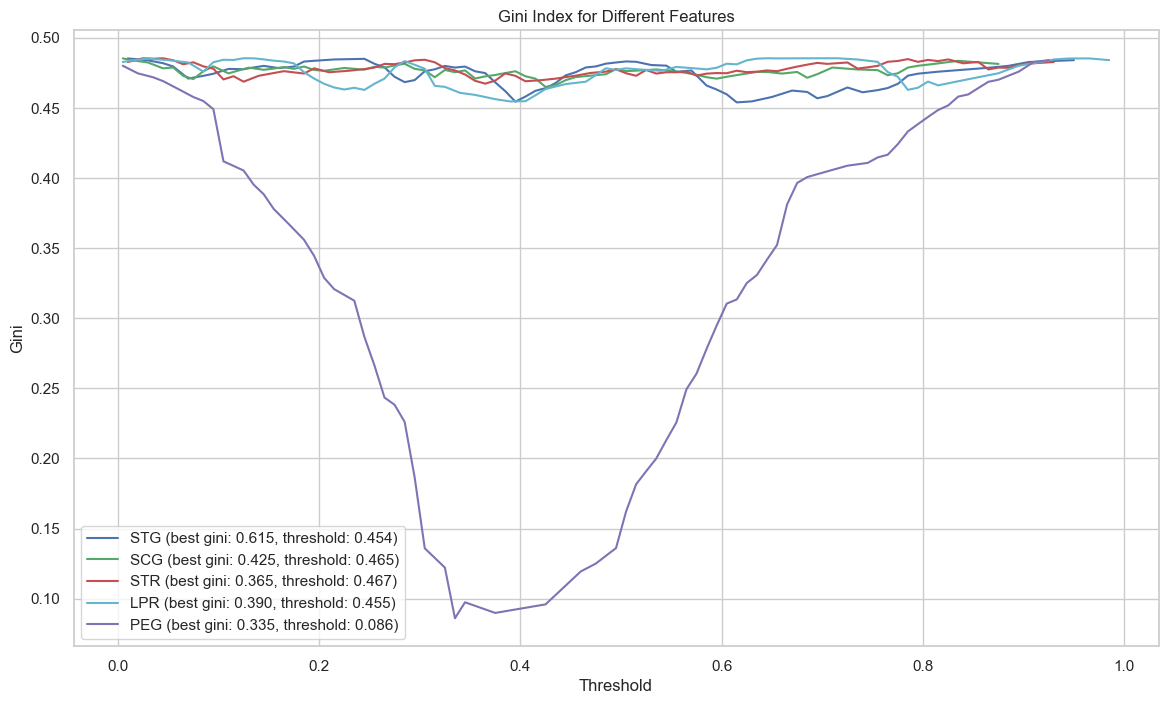

In [11]:
import tree_code

# Создание фигуры и оси

fig, ax = plt.subplots(figsize=(14, 8))
# Задаем цветовую палитру для разных графиков
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# Итерация по признакам и построение графиков
for i, feature in enumerate(['STG', 'SCG', 'STR', 'LPR', 'PEG']):
    thresholds, ginis, best_gini, best_threshold = tree_code.find_best_split(df[[feature]].to_numpy(), df[['UNS']].to_numpy())
    ax.plot(thresholds, ginis, label=f'{feature} (best gini: {best_gini:.3f}, threshold: {best_threshold:.3f})', color=colors[i])

# Настройка графика
ax.set_title('Gini Index for Different Features')
ax.set_xlabel('Threshold')
ax.set_ylabel('Gini')
ax.legend(loc='best')

# Отображение графика
plt.show()

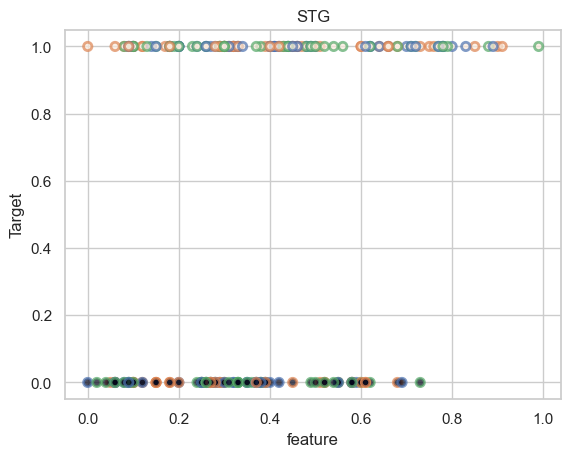

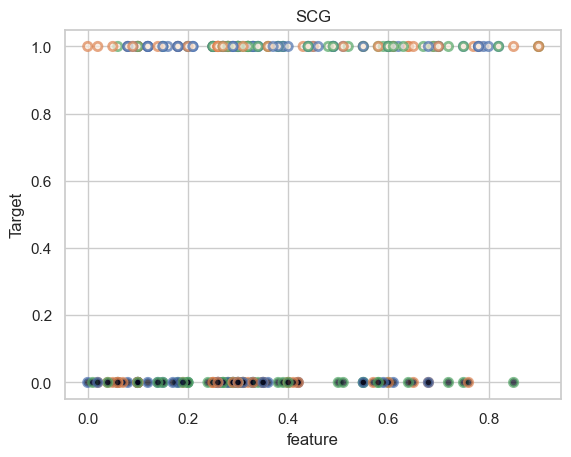

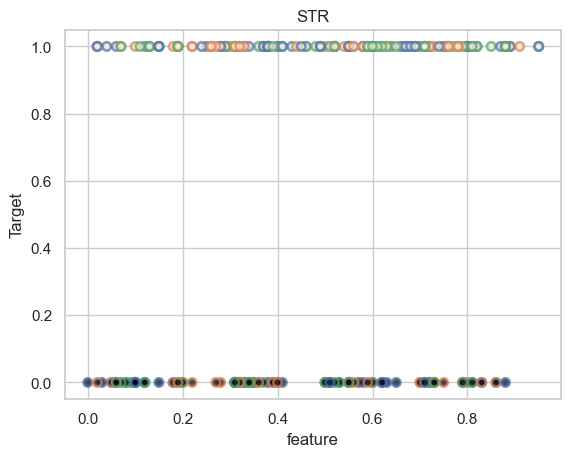

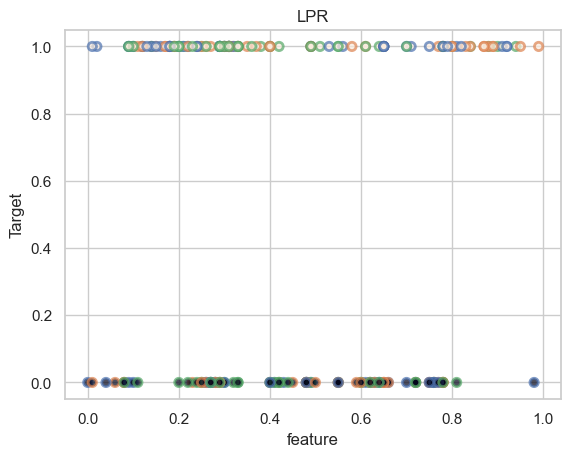

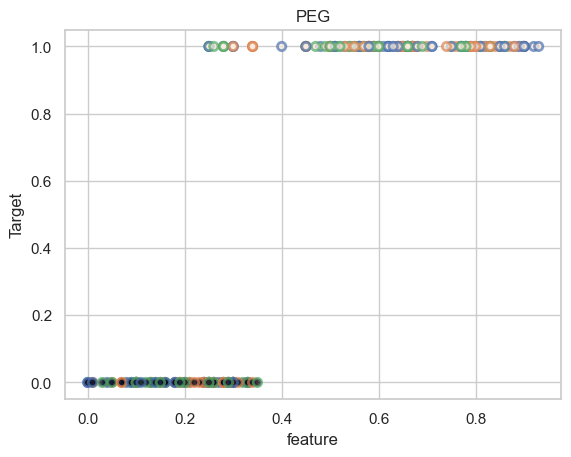

In [12]:
for i, feature in enumerate(['STG', 'SCG', 'STR', 'LPR', 'PEG']):
    plt.scatter(
            df[feature],
            df['UNS'],
            c=df['UNS'],
            alpha=0.7,
            edgecolors=np.array(palette)[y],
            linewidths=2,
    )
    plt.title(feature)
    plt.xlabel('feature')
    plt.ylabel('Target')
    plt.show()

__Задание 5. [0.25 балла]__

На основании кривых критерия Джини, по какому признаку стоит разделить выборку на два поддерева? Совпадает ли этот выбор с визуальной оценкой scatter-графиков? Как бы вы описали вид кривой для "хороших" признаков, по которым выборка делится почти идеально, и чем кривые таких признаков отличаются от кривых признаков, по которым разделение практически невозможно?

**Ответ:** Следует раздиелить по PEG. Он совпадает с визуальной оценкой, как как на графике видно что в районе 0.4 группы хорошо разделяются прямой. Вид хорошей кривой - она вогнутая и монотонно возрастает при удалении от точки минимума в разные стороны.

__Задание 6. [0.75 балла].__

Разберитесь с уже написанным кодом в классе DecisionTree модуля tree_code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».




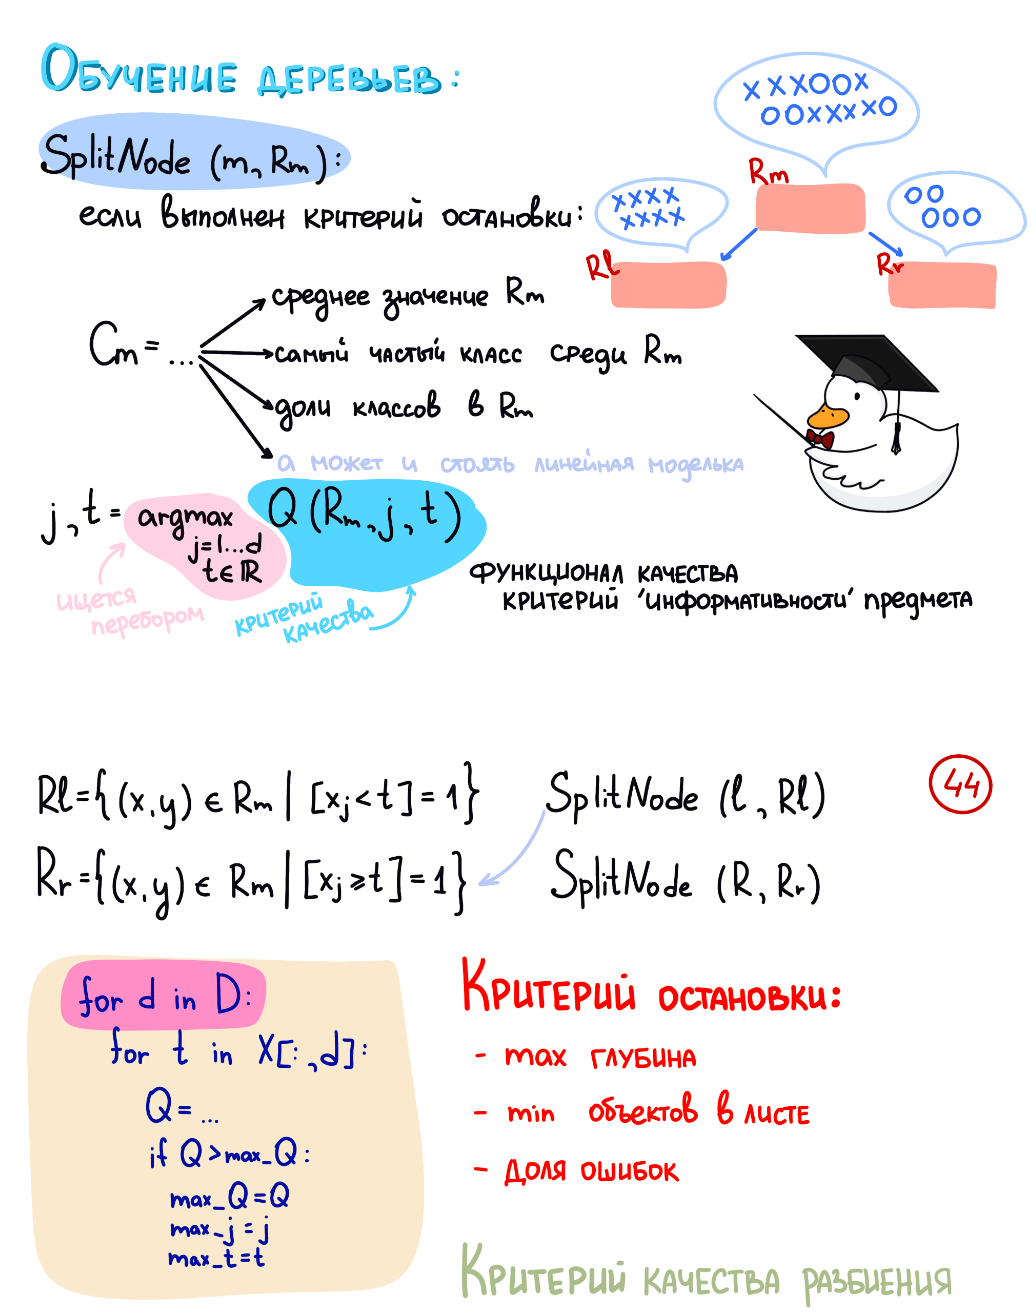

__Задание 7. [0.25 балла]__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно открыть` agaricus-lepiota.data`, прочитать ее с помощью pandas (не забудьте про `agaricus-lepiota.names`), применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

_SPOILER: У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево_

In [13]:
df = pd.read_csv('agaricus-lepiota.data', header=None)

In [14]:
columns = [
'target',
'cap-shape',
'cap-surface',
'cap-color',
'bruises',
'odor',
'gill-attachment',
'gill-spacing',
'gill-size',
'gill-color',
'stalk-shape',
'stalk-root',
'stalk-surface-above-ring',
'stalk-surface-below-ring',
'stalk-color-above-ring',
'stalk-color-below-ring',
'veil-type',
'veil-color',
'ring-number',
'ring-type',
'spore-print-color',
'population',
'habitat'
]
df.columns = columns

df.head()

,target,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [15]:
from sklearn.preprocessing import LabelEncoder

df_transformed = pd.DataFrame()

for column in df.columns:
    le = LabelEncoder()
    df_transformed[column] = le.fit_transform(df[column])

X = df_transformed.drop(['target'], axis=1)
y = df_transformed['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

In [16]:
import tree_code

dt = tree_code.DecisionTree(['real' for i in range(22)], max_depth=10, min_samples_split=10, min_samples_leaf=10)
dt.fit(X_train.to_numpy(), y_train.to_numpy())
y_pred = dt.predict(X_test.to_numpy())
print(f'Итоговая accuracy {accuracy_score(y_test.to_numpy(), y_pred)}')

Итоговая accuracy 1.0


__Задание 8. [1 балл]__

Загрузите следующие наборы данных, предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

**Задача**:

Закодировать категориальные признаки в наборе данных с использованием `LabelEncoder`. Затем, применив `cross_val_score` (cv=10), оценить метрику accuracy для следующих алгоритмов:

1. **DecisionTree**, обрабатывающий все признаки как вещественные.
2. **DecisionTree**, обрабатывающий все признаки как категориальные.
3. **DecisionTree**, обрабатывающий все признаки как вещественные + one-hot encoding всех признаков.
4. **DecisionTreeClassifier** из `sklearn`.

**Инструкция**:
1. Закодировать категориальные признаки с помощью `LabelEncoder`.
2. Оценить accuracy, используя `cross_val_score` (cv=10) и `scoring=make_scorer(accuracy_score)`.
3. Если позволяет память, установить параметр `sparse=False` в `OneHotEncoder`.
4. Результаты сохранить в `pd.DataFrame` (по строкам — наборы данных, по столбцам — алгоритмы).

**Рекомендации**:
- Для вычисления точности используйте `scoring=make_scorer(accuracy_score)` из `sklearn.metrics`.

In [17]:
Xs = []
ys = []
Xs.append(X)
ys.append(y)

In [18]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('tic-tac-toe-endgame.csv')


df_transformed = pd.DataFrame()

for column in df.columns:
    le = LabelEncoder()
    df_transformed[column] = le.fit_transform(df[column])

X = df_transformed.drop(['V10'], axis=1)
y = df_transformed['V10']

Xs.append(X)
ys.append(y)

In [19]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('car.data')

columns = [
'buying',
'maint',
'doors',
'persons',
'lug_boot',
'safety',
'target'
]
df.columns = columns

df_transformed = pd.DataFrame()

for column in df.columns:
    le = LabelEncoder()
    df_transformed[column] = le.fit_transform(df[column])

X = df_transformed.drop(['target'], axis=1)
y = df_transformed['target']

Xs.append(X)
ys.append(y)

In [20]:
df = pd.read_csv('nursery.data')
df

,usual,proper,complete,1,convenient,convenient.1,nonprob,recommended,recommend
0,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
1,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
2,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
3,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
4,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom
...,...,...,...,...,...,...,...,...,...
12954,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,priority,spec_prior
12955,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,not_recom,not_recom
12956,great_pret,very_crit,foster,more,critical,inconv,problematic,recommended,spec_prior
12957,great_pret,very_crit,foster,more,critical,inconv,problematic,priority,spec_prior


In [21]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('nursery.data')

columns = [
'parents', 
'has_nurs',
'form',    
'children',
'housing', 
'finance', 
'social',  
'health',
'target'
]
df.columns = columns

mapping = {
    'not_recom': 0,
    'recommend': 0,
    'very_recom': 1,
    'priority': 1,
    'spec_prior': 1
}

df['target'] = df['target'].map(mapping)

df_transformed = pd.DataFrame()

for column in df.columns:
    le = LabelEncoder()
    df_transformed[column] = le.fit_transform(df[column])

X = df_transformed.drop(['target'], axis=1)
y = df_transformed['target']

Xs.append(X)
ys.append(y)

In [22]:
from sklearn.model_selection import cross_val_score

scores = pd.DataFrame()

scores_numbers = []

for i in range(len(Xs)):
    X = Xs[i]
    y = ys[i]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42, stratify=y)
    dt = tree_code.DecisionTree(['real' for i in range(22)], max_depth=10, min_samples_split=10, min_samples_leaf=10)
    dt.fit(X_train.to_numpy(), y_train.to_numpy())
    cv_score = cross_val_score(dt, X_test.to_numpy(), y_test.to_numpy(), cv=10, scoring='accuracy')
    scores_numbers.append(np.mean(cv_score))
    print(f'Итоговая accuracy {np.mean(cv_score)}')

scores['Все признаки числовые'] = np.array(scores_numbers)


Итоговая accuracy 1.0
Итоговая accuracy 0.8227956254272044
Итоговая accuracy 0.9305755395683454
Итоговая accuracy 0.9999035679845708


In [23]:
scores_categorical = []

for i in range(len(Xs)):
    X = Xs[i]
    y = ys[i]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42, stratify=y)
    dt = tree_code.DecisionTree(['categorical' for i in range(22)], max_depth=10, min_samples_split=10, min_samples_leaf=10)
    dt.fit(X_train.to_numpy(), y_train.to_numpy())
    cv_score = cross_val_score(dt, X_test.to_numpy(), y_test.to_numpy(), cv=10, scoring='accuracy')
    scores_categorical.append(np.mean(cv_score))
    print(f'Итоговая accuracy {np.mean(cv_score)}')

scores['Все признаки categorical'] = np.array(scores_categorical)

Итоговая accuracy 1.0
Итоговая accuracy 0.9283321941216679
Итоговая accuracy 0.9218694609529766
Итоговая accuracy 0.9999035679845708


In [24]:
from sklearn.preprocessing import OneHotEncoder

scores_categorical_ohe = []

for i in range(len(Xs)):
    X = Xs[i]
    y = ys[i]
    ohe = OneHotEncoder()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=3, stratify=y)
    dt = tree_code.DecisionTree(['real' for i in range(117)], max_depth=10, min_samples_split=10, min_samples_leaf=10)
    dt.fit(ohe.fit_transform(X_train.to_numpy()).toarray(), y_train.to_numpy())
    cv_score = cross_val_score(dt, ohe.transform(X_test.to_numpy()).toarray(), y_test.to_numpy(), cv=10, scoring='accuracy')
    scores_categorical_ohe.append(np.mean(cv_score))
    print(f'Итоговая accuracy {np.mean(cv_score)}')

scores['categorical + ohe'] = np.array(scores_categorical_ohe)

Итоговая accuracy 1.0
Итоговая accuracy 0.9256493506493506
Итоговая accuracy 0.9283390678761337
Итоговая accuracy 0.9999035679845708


In [25]:
from sklearn.preprocessing import OneHotEncoder

scores_original = []

for i in range(len(Xs)):
    X = Xs[i]
    y = ys[i]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=3, stratify=y)
    dt = DecisionTreeClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=10)
    dt.fit(X_train.to_numpy(), y_train.to_numpy())
    cv_score = cross_val_score(dt, X_test.to_numpy(), y_test.to_numpy(), cv=10, scoring='accuracy')
    scores_original.append(np.mean(cv_score))
    print(f'Итоговая accuracy {np.mean(cv_score)}')

scores['original DecisionTreeClassifier'] = np.array(scores_original)

Итоговая accuracy 0.9984615384615386
Итоговая accuracy 0.8173615857826384
Итоговая accuracy 0.9348660202272965
Итоговая accuracy 0.9999035679845708


In [26]:
scores

,Все признаки числовые,Все признаки categorical,categorical + ohe,original DecisionTreeClassifier
0,1.000000,1.000000,1.000000,0.998462
1,0.822796,0.928332,0.925649,0.817362
2,0.930576,0.921869,0.928339,0.934866
3,0.999904,0.999904,0.999904,0.999904


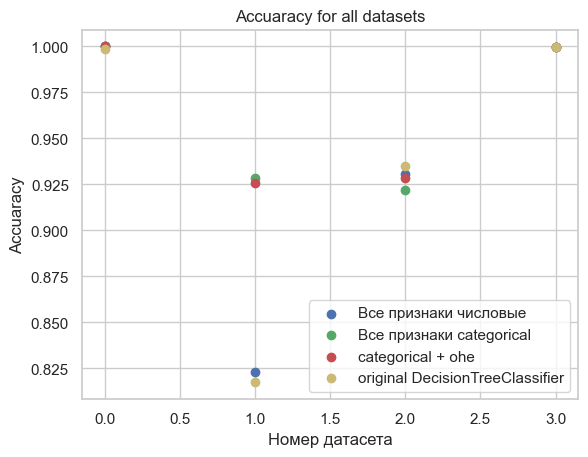

In [27]:
fig, ax = plt.subplots()
# Задаем цветовую палитру для разных графиков
colors = ['b', 'g', 'r', 'y', 'm']

# Итерация по признакам и построение графиков
for i, column in enumerate(scores.columns):
    ax.scatter(range(4), scores[column].to_numpy(), label=f'{column}', color=colors[i])

# Настройка графика
ax.set_title('Accuaracy for all datasets')
ax.set_xlabel('Номер датасета')
ax.set_ylabel('Accuaracy')
ax.legend(loc='best')

# Отображение графика
plt.show()

__Задание 9. [0.5 балла]__

Проанализируйте результаты эксперимента: одинаково ли алгоритмы ранжируются на разных наборах данных? Подумайте, почему так происходит. Обратите внимание на значения признаков в разных наборах данных и определите, присутствует ли в результатах какая-то случайная компонента. Можно ли как-то повлиять на нее и улучшить работу алгоритмов?


Алгоритмы ранжируются практически одинакого, за исключением 1 датасета. Числовые признаки и оригинальное дерево там показывают себя плохо. Возможно оно под капотом по умолчанию тоже приводит категориальные признаки к числовым. 

# Как дела?

Все супер. У тебя как?